# Limpieza del dataset

In [10]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [11]:
# leer fichero en local
df = pd.read_csv('cumulative.csv')


Comprobamos los tipos y la cantidad de instacias que se tiene

In [3]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(9564, 50)
rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi



# Missing values

## Heatmap


<AxesSubplot:>

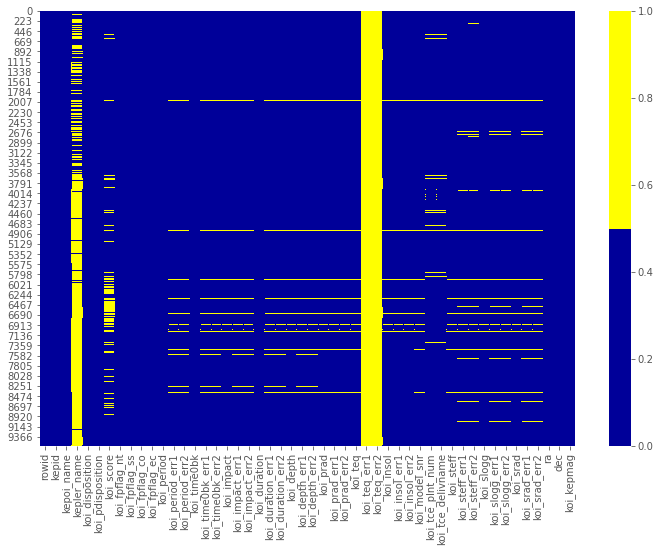

In [42]:
cols = df.columns # first 30 columns
colours = ['#000099', '#ffff00'] #yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

## Missing Data Percentage List
Cuando hay muchas características en el conjunto de datos, podemos hacer una lista de los % de datos que faltan para cada característica.

Puede ser mucho más útil que el anterior cuando tienes muchas características y muchos valores

In [43]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


rowid - 0%
kepid - 0%
kepoi_name - 0%
kepler_name - 76%
koi_disposition - 0%
koi_pdisposition - 0%
koi_score - 16%
koi_fpflag_nt - 0%
koi_fpflag_ss - 0%
koi_fpflag_co - 0%
koi_fpflag_ec - 0%
koi_period - 0%
koi_period_err1 - 5%
koi_period_err2 - 5%
koi_time0bk - 0%
koi_time0bk_err1 - 5%
koi_time0bk_err2 - 5%
koi_impact - 4%
koi_impact_err1 - 5%
koi_impact_err2 - 5%
koi_duration - 0%
koi_duration_err1 - 5%
koi_duration_err2 - 5%
koi_depth - 4%
koi_depth_err1 - 5%
koi_depth_err2 - 5%
koi_prad - 4%
koi_prad_err1 - 4%
koi_prad_err2 - 4%
koi_teq - 4%
koi_teq_err1 - 100%
koi_teq_err2 - 100%
koi_insol - 3%
koi_insol_err1 - 3%
koi_insol_err2 - 3%
koi_model_snr - 4%
koi_tce_plnt_num - 4%
koi_tce_delivname - 4%
koi_steff - 4%
koi_steff_err1 - 5%
koi_steff_err2 - 5%
koi_slogg - 4%
koi_slogg_err1 - 5%
koi_slogg_err2 - 5%
koi_srad - 4%
koi_srad_err1 - 5%
koi_srad_err2 - 5%
ra - 0%
dec - 0%
koi_kepmag - 0%


## Missing Data Histogram


for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing



ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


##  Borrar instancias con mas de 16 missing



In [12]:
df1 = df[df.isnull().sum(axis=1) <= 16]

In [13]:
df1.shape

(9199, 50)

## Borrar campos nulos



In [14]:

df2 = df1.drop(['koi_teq_err1','koi_teq_err2'], axis=1)
print(df2.shape)

(9199, 48)


In [15]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rowid - 0%
kepid - 0%
kepoi_name - 0%
kepler_name - 75%
koi_disposition - 0%
koi_pdisposition - 0%
koi_score - 13%
koi_fpflag_nt - 0%
koi_fpflag_ss - 0%
koi_fpflag_co - 0%
koi_fpflag_ec - 0%
koi_period - 0%
koi_period_err1 - 1%
koi_period_err2 - 1%
koi_time0bk - 0%
koi_time0bk_err1 - 1%
koi_time0bk_err2 - 1%
koi_impact - 0%
koi_impact_err1 - 1%
koi_impact_err2 - 1%
koi_duration - 0%
koi_duration_err1 - 1%
koi_duration_err2 - 1%
koi_depth - 0%
koi_depth_err1 - 1%
koi_depth_err2 - 1%
koi_prad - 0%
koi_prad_err1 - 0%
koi_prad_err2 - 0%
koi_teq - 0%
koi_insol - 0%
koi_insol_err1 - 0%
koi_insol_err2 - 0%
koi_model_snr - 0%
koi_tce_plnt_num - 3%
koi_tce_delivname - 3%
koi_steff - 0%
koi_steff_err1 - 1%
koi_steff_err2 - 1%
koi_slogg - 0%
koi_slogg_err1 - 1%
koi_slogg_err2 - 1%
koi_srad - 0%
koi_srad_err1 - 1%
koi_srad_err2 - 1%
ra - 0%
dec - 0%
koi_kepmag - 0%


## Imputar missing




In [16]:
# remplazar missing values con mean.


df2['koi_period_err1'] = df2['koi_period_err1'].fillna(df2['koi_period_err1'].mean())
df2['koi_period_err2'] = df2['koi_period_err2'].fillna(df2['koi_period_err2'].mean())

df2['koi_time0bk_err1'] = df2['koi_time0bk_err1'].fillna(df2['koi_time0bk_err1'].mean())
df2['koi_time0bk_err2'] = df2['koi_time0bk_err2'].fillna(df2['koi_time0bk_err2'].mean())

df2['koi_impact_err1'] = df2['koi_impact_err1'].fillna(df2['koi_impact_err1'].mean())
df2['koi_impact_err2'] = df2['koi_impact_err2'].fillna(df2['koi_impact_err2'].mean())

df2['koi_duration_err1'] = df2['koi_duration_err1'].fillna(df2['koi_duration_err1'].mean())
df2['koi_duration_err2'] = df2['koi_duration_err2'].fillna(df2['koi_duration_err2'].mean())

df2['koi_depth_err1'] = df2['koi_depth_err1'].fillna(df2['koi_depth_err1'].mean())
df2['koi_depth_err2'] = df2['koi_depth_err2'].fillna(df2['koi_depth_err2'].mean())

df2['koi_prad_err1'] = df2['koi_prad_err1'].fillna(df2['koi_prad_err1'].mean())
df2['koi_prad_err2'] = df2['koi_prad_err2'].fillna(df2['koi_prad_err2'].mean())

df2['koi_insol_err1'] = df2['koi_insol_err1'].fillna(df2['koi_insol_err1'].mean())
df2['koi_insol_err2'] = df2['koi_insol_err2'].fillna(df2['koi_insol_err2'].mean())

df2['koi_steff_err1'] = df2['koi_steff_err1'].fillna(df2['koi_steff_err1'].mean())
df2['koi_steff_err2'] = df2['koi_steff_err2'].fillna(df2['koi_steff_err2'].mean())

df2['koi_slogg_err1'] = df2['koi_slogg_err1'].fillna(df2['koi_slogg_err1'].mean())
df2['koi_slogg_err2'] = df2['koi_slogg_err2'].fillna(df2['koi_slogg_err2'].mean())

df2['koi_srad_err1'] = df2['koi_srad_err1'].fillna(df2['koi_srad_err1'].mean())
df2['koi_srad_err2'] = df2['koi_srad_err2'].fillna(df2['koi_srad_err2'].mean())

In [21]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rowid - 0%
kepid - 0%
kepoi_name - 0%
kepler_name - 0%
koi_disposition - 0%
koi_pdisposition - 0%
koi_score - 0%
koi_fpflag_nt - 0%
koi_fpflag_ss - 0%
koi_fpflag_co - 0%
koi_fpflag_ec - 0%
koi_period - 0%
koi_period_err1 - 0%
koi_period_err2 - 0%
koi_time0bk - 0%
koi_time0bk_err1 - 0%
koi_time0bk_err2 - 0%
koi_impact - 0%
koi_impact_err1 - 0%
koi_impact_err2 - 0%
koi_duration - 0%
koi_duration_err1 - 0%
koi_duration_err2 - 0%
koi_depth - 0%
koi_depth_err1 - 0%
koi_depth_err2 - 0%
koi_prad - 0%
koi_prad_err1 - 0%
koi_prad_err2 - 0%
koi_teq - 0%
koi_insol - 0%
koi_insol_err1 - 0%
koi_insol_err2 - 0%
koi_model_snr - 0%
koi_tce_plnt_num - 0%
koi_tce_delivname - 0%
koi_steff - 0%
koi_steff_err1 - 0%
koi_steff_err2 - 0%
koi_slogg - 0%
koi_slogg_err1 - 0%
koi_slogg_err2 - 0%
koi_srad - 0%
koi_srad_err1 - 0%
koi_srad_err2 - 0%
ra - 0%
dec - 0%
koi_kepmag - 0%


In [19]:
# variables categoricas
df2['kepler_name'] = df2['kepler_name'].fillna('NULO')
df2['koi_tce_delivname'] = df2['koi_tce_delivname'].fillna('NULO')

In [20]:
df2['koi_score'] = df2['koi_score'].fillna(0)
df2['koi_tce_plnt_num'] = df2['koi_tce_plnt_num'].fillna(0)


# Outliers




In [22]:
df_numeric= df2[['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad']]

In [23]:
df_numeric.describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
count,9199.000000,9199.000000,9199.000000,9199.000000,9.199000e+03,9199.000000,9199.000000,9.199000e+03,9199.000000,9199.000000,9199.000000,9199.000000
mean,74.301326,165.467193,0.735174,5.655394,2.379646e+04,102.913846,1085.410153,7.718103e+03,259.950690,5706.807370,4.310129,1.728870
std,1360.685828,67.321422,3.349193,6.500235,8.225089e+04,3077.973343,856.386276,1.595628e+05,795.884165,796.943846,0.432649,6.127841
min,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,2661.000000,0.047000,0.109000
25%,2.683082,132.746285,0.197000,2.453800,1.600000e+02,1.400000,539.000000,2.001000e+01,12.000000,5309.500000,4.218000,0.829000
50%,9.296746,137.020590,0.537000,3.825270,4.212000e+02,2.400000,878.000000,1.407300e+02,23.000000,5767.000000,4.438000,1.000000
75%,36.813635,170.371510,0.889000,6.293415,1.474150e+03,14.935000,1378.500000,8.531700e+02,78.150000,6112.500000,4.543000,1.345000
max,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,15896.000000,5.364000,229.908000


Sustitución de los outliers por la media de esa columna

In [24]:

df2['koi_prad'] = df2['koi_prad'].apply(lambda x: df2.loc[df2['koi_prad'] < 10, 'koi_prad'].mean()
                                      if x > 10 else x)

df2['koi_teq'] = df2['koi_teq'].apply(lambda x: df2.loc[df2['koi_teq'] < 2400, 'koi_teq'].mean()
                                      if x > 2400 else x)

df2['koi_srad'] = df2['koi_srad'].apply(lambda x: df2.loc[(df2['koi_srad'] < 1700) & (df2['koi_srad'] > 0.085),
                                                          'koi_srad'].mean()
                                      if x > 1700 or x < 0.085 else x)

<ipython-input-25-b1272a44ad02>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 1).set_title('Distribución radios planetas')
<ipython-input-25-b1272a44ad02>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 2).set_title('Distribución temperaturas planetas')
<ipython-input-25-b1272a44ad02>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reu

Text(0.5, 1.0, 'Distribución temperaturas estrellas')

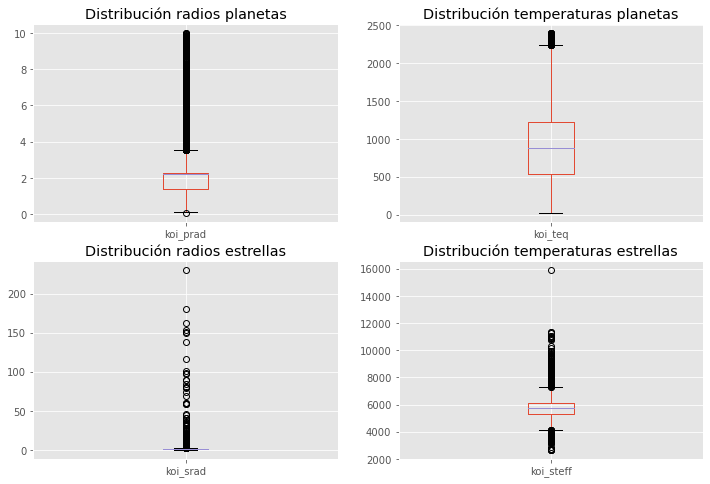

In [25]:
plt.subplot(2, 2, 1)
df2.boxplot(column=['koi_prad'])
plt.subplot(2, 2, 1).set_title('Distribución radios planetas')

plt.subplot(2, 2, 2)
df2.boxplot(column=['koi_teq'])
plt.subplot(2, 2, 2).set_title('Distribución temperaturas planetas')

plt.subplot(2, 2, 3)
df2.boxplot(column=['koi_srad'])
plt.subplot(2, 2, 3).set_title('Distribución radios estrellas')

plt.subplot(2, 2, 4)
df2.boxplot(column=['koi_steff'])
plt.subplot(2, 2, 4).set_title('Distribución temperaturas estrellas')


In [28]:
df2.to_csv('kepler_limpio.csv', index=False)